# Laboratorio 5: Clustering

Integrantes: **Vicente Leyton C. - Andrés Salazar C.** y la sección de cada integrante

## ============= Declaración de compromiso ético =============

Nosotros ****Vicente Leyton C. - Andrés Salazar C. Sección 1**** , declaramos que realizamos de manera grupal los pasos de la presente actividad. También declaramos no incurrir en copia, ni compartir nuestras respuestas con otras personas ni con otros grupos. Por lo que, ratificamos que las respuestas son de nuestra propia confección y reflejan nuestro propio conocimiento.


# Instrucciones


1. Trabajen en equipos de dos personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2. Modifiquen este archivo `.ipynb` agregando sus respuestas donde corresponda.

3. Cuando finalicen el laboratorio, **generen un archivo HTML** usando jupyter (ver tutorial 3) y súbanlo a U-Cursos. El laboratorio debe ser entregado sólo por 1 integrante. Si se entrega por más de un integrante, se revisará cualquiera de éstos.

Para este lab trabajaremos con un dataset de vino y haremos clustering sobre el.

In [62]:
from sklearn.cluster import DBSCAN
import pandas as pd

dataframe = pd.read_csv("https://raw.githubusercontent.com/mzambrano1/Datasets-CC5205-otono-2023/master/lab4.2%20primavera/wine-clustering.csv")
X = pd.DataFrame(dataframe)
X

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Visualizar los datos

### Pregunta 1

Aplique PCA sobre los datos para reducirlos a solo dos dimensiones. Visualice los datos mediante un scatterplot.
Responda brevemente:

1. ¿Cuantos clusters cree que hay?
2. ¿Qué algoritmo de clustering podría funcionar mejor?

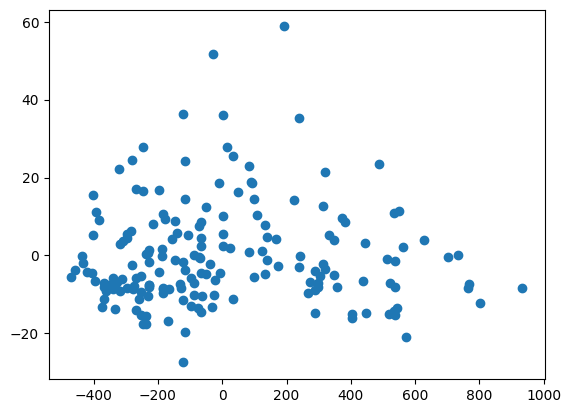

In [63]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Escriba su código aquí
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
plt.show()

**Respuesta:**

> 1. Entre 1 y 3 clusters.

> 2. Cualquiera menos DBSCAN está bien.

## K-Means

### Pregunta 2

Ahora compararemos Dos algoritmos de clustering con los datos. Partiremos con K-means


Cuando usamos K-Means debemos definir previamente el número de clusters que queremos generar. Teniendo en cuenta estos datos, implemente el método del codo. ¿Cuántos clusters propone usar para este dataset? Escoja dos opciones y justifique su elección.

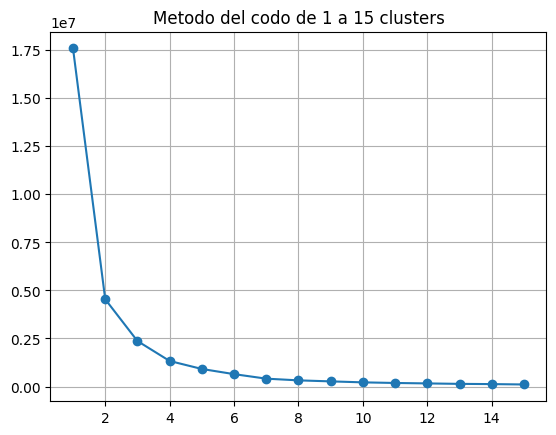

In [64]:
from sklearn.cluster import KMeans

# Escriba su código aquí
sse = []

clusters = list(range(1, 16))
for k in clusters:
    kmeans = KMeans(n_clusters=k, n_init=10).fit(X_reduced)
    sse.append(kmeans.inertia_)

plt.plot(clusters, sse, marker="o")
plt.title("Metodo del codo de 1 a 15 clusters")
plt.grid(True)
plt.show()

**Respuesta:**
 
> Elegimos quedarnos con 2 y 3 clusters para el análisis porque es ahí donde se encuentra el punto de inflexión

### Pregunta 3

 Genere un gráfico para cada uno de los dos `k` elegidos para tener una representación visual de los clusters. (usando los datos reducidos)

In [65]:
# Escriba su código aquí
kmeans = KMeans(n_clusters=2, n_init=10).fit(X_reduced)

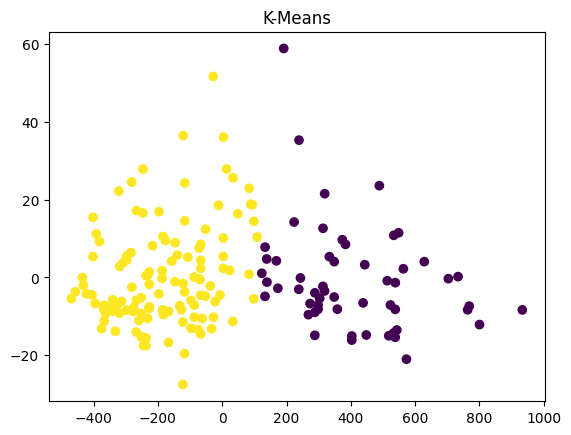

In [66]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans.labels_)
plt.title("K-Means")
plt.show()

In [67]:
# Escriba su código aquí
kmeans_2 = KMeans(n_clusters=3, n_init=10).fit(X_reduced)

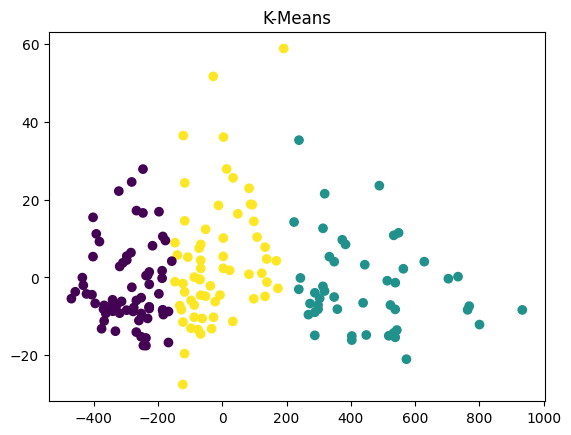

In [68]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans_2.labels_)
plt.title("K-Means")
plt.show()

## Clustering Jerárquico

### Pregunta 4

 Usando los datos anteriores, ejecute cada uno de los 4 métodos de clustering jerárquico: complete, single, average y ward, utilizando la metrica de distancia por defecto y visualice los dendrogramas formados. Adjunte el código necesario. No necesita generar los 4 dendrogramas en el mismo gráfico, pueden ser gráficos separados (individuales).

In [69]:
from scipy.cluster.hierarchy import dendrogram, linkage

complete = linkage(X_reduced, method="complete")
single = linkage(X_reduced, method="single")
average = linkage(X_reduced, method="average")
ward = linkage(X_reduced, method="ward")

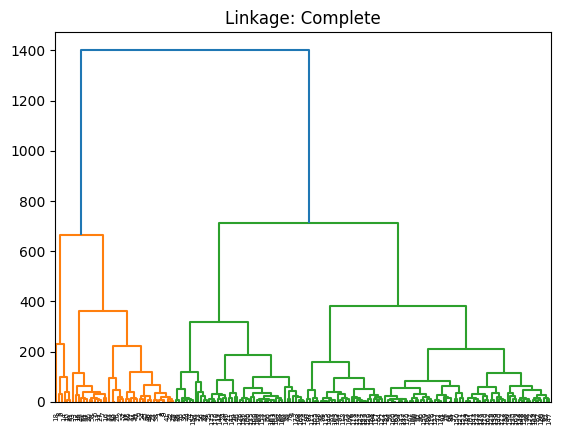

In [70]:
# Escriba su código aquí
dendrogram(complete)
plt.title("Linkage: Complete")
plt.show()

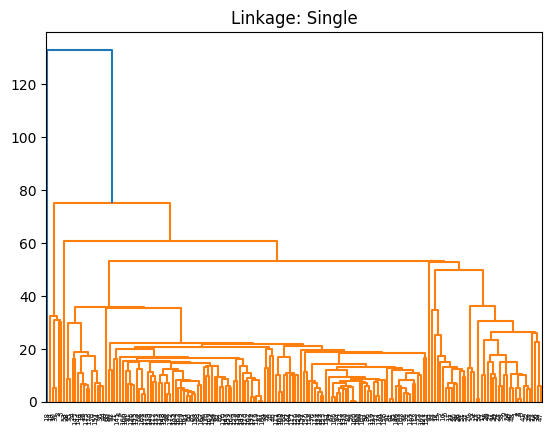

In [71]:
# Escriba su código aquí
dendrogram(single)
plt.title("Linkage: Single")
plt.show()

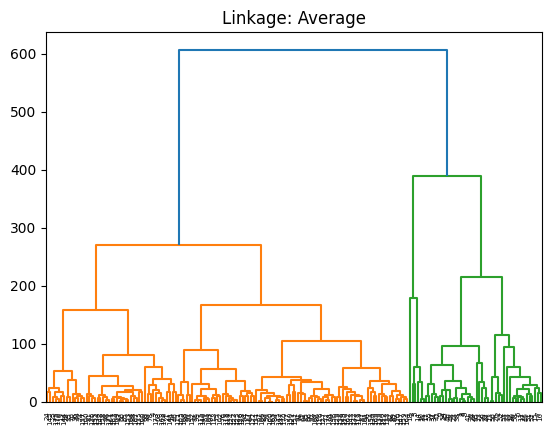

In [72]:
# Escriba su código aquí
dendrogram(average)
plt.title("Linkage: Average")
plt.show()

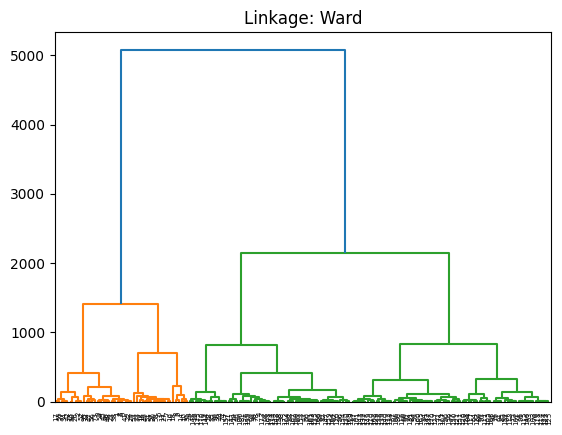

In [73]:
# Escriba su código aquí
dendrogram(ward)
plt.title("Linkage: Ward")
plt.show()

### Pregunta 5

Fijándose en el método `complete`, ¿"visualmente" cuántos clusters propone usar? ¿A qué altura recomendaría cortar el árbol?

**Respuesta**

> Proponemos ocupar 3 clusters, cortando el árbol a altura 700, de esta forma nos quedamos con el cluster naranjo y alcanzamos a separar el verde en dos

### Pregunta 6

 Implemente el código para asignar clusters a los datos siguiendo lo que usted propuso en la pregunta anterior y liste la asignación de clusters para cada registro del dataset usando el método `complete`. Señale cuántos clusters se generan cortando la altura que propuso en la pregunta anterior. Luego, usando el dataset con dimensiones reducidas generado en la parte K-means (`new_X`), grafique los datos y píntelos con su asignacion de clusters según el métodos `complete` para tener una representación visual de los clusters.

In [74]:
from sklearn.cluster import AgglomerativeClustering

# Escriba su código aquí
complete_3 = AgglomerativeClustering(n_clusters=None, linkage="complete", distance_threshold=700).fit(X_reduced)
print(complete_3.n_clusters_)

3


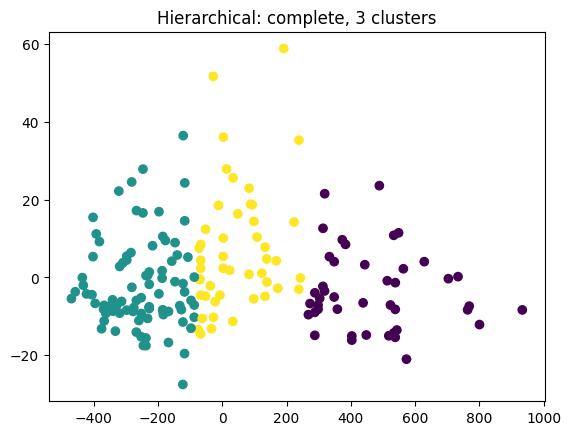

In [75]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=complete_3.labels_)
plt.title("Hierarchical: complete, 3 clusters")
plt.show()

## DBSCAN

Ahora probaremos hacer el clustering con el método DBSCAN.


### Pregunta 7

 Estime el valor `eps` usando el método de la rodilla (basado en KNN). La idea de este procedimiento es calcular la distancia promedio de cada punto a sus `k` vecinos más cercanos los cuales son graficados en orden ascendente. El objetivo es determinar la _rodilla_, que corresponde al valor óptimo de `eps`. Pruebe varios valores de `y` utilizando el siguiente código y adjunte el gráfico para el mejor `y` que usted considere. Explique porque escogio el valor `y` como mejor opción. Luego ejecute y grafique los clusters usando el método DBSCAN haciendo uso de parámetro `eps` (`y`) encontrado previamente. ¿Cuántos clusters se encontraron?

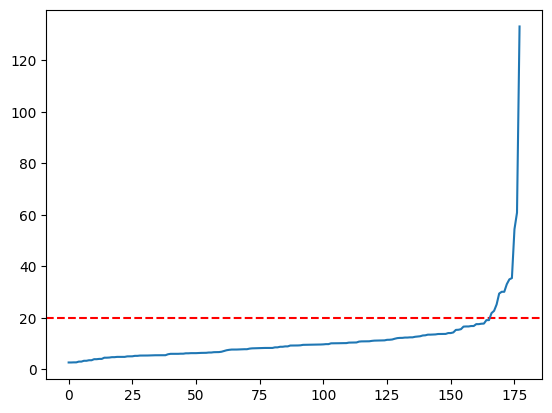

In [76]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

nbrs = NearestNeighbors(n_neighbors=3).fit(X)
distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

fig, ax = plt.subplots()

ax.axhline(y=20.0, color='r', linestyle='--') # Ajuste el valor para y
ax.plot(distances)

plt.show()

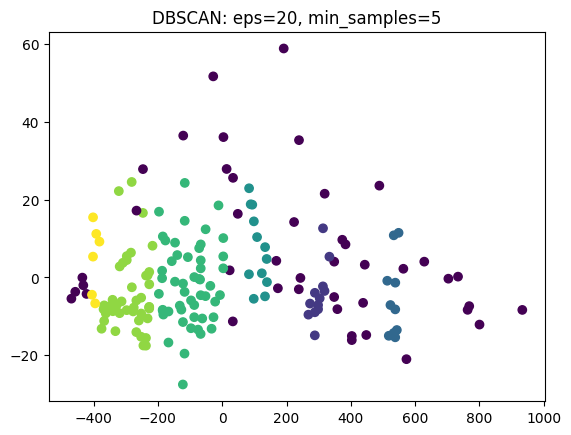

In [77]:
# Escriba su código aquí
eps = 20
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X_reduced)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=dbscan.labels_)
plt.title("DBSCAN: eps=20, min_samples=5")
plt.show()

**Respuesta**

> Se encontraron 6 clusters

## Evaluación

### Pregunta 8

 Para evaluar clusters existen una serie de métodos y métricas. En esta parte usaremos el coeficiente de Silhouette. Para cada uno de los experimentos (los dos de la parte de `kmeans`, el con el método `complete` en la parte de clustering jerárquico y el con `DBSCAN`), adjunte el código que permita obtener el Silhouette score de los modelos. En base a los valores obtenidos para cada método y configuración. ¿Cuál cree que es el que tiene mejor resultado? Comente al respecto basándose principalmente en los resultados.

In [78]:
from sklearn.metrics import silhouette_score

# Escriba su código aquí
print("Dataset X K-Means2\t", silhouette_score(X_reduced, kmeans.labels_))
print("Dataset X K-Means3\t", silhouette_score(X_reduced, kmeans_2.labels_))
print("Dataset X Complete\t", silhouette_score(X_reduced, complete_3.labels_))

_filter_label = dbscan.labels_ >= 0
print("Dataset X DBSCAN\t", silhouette_score(X_reduced[_filter_label], dbscan.labels_[_filter_label])) 

Dataset X K-Means2	 0.6572176888364498
Dataset X K-Means3	 0.5722554756855064
Dataset X Complete	 0.531801534825748
Dataset X DBSCAN	 0.5380393683224773


**Respuesta**

> El que tiene mejor resultado corresponde al que se acerque más a 1 (que esté mejor asignado), en este caso, K-Means2

### Pregunta 9

 Ahora compararemos los métodos usando matrices de similitud, para esto ejecute el código de la siguiente celda y complete las que vienen.
Comente acerca de las matrices generadas, ¿Cuál estaría generando un mejor clustering?


In [79]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Escriba su código aquí
def sim_matrix(features, labels):
    useful_labels = labels >= 0

    # primero ordenamos los datos en base al cluster que pertencen
    indices = np.argsort(labels[useful_labels])
    sorted_features = features[useful_labels][indices]

    # calculamos las similitud entre todos los puntos
    d = cosine_similarity(sorted_features, sorted_features)
    return d

def plot(data, model):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

    fig.suptitle(f"{model.__class__.__name__}")

    ax1.scatter(data[:,0], data[:,1], c=model.labels_)

    sim = sim_matrix(data, model.labels_)
    im = ax2.imshow(sim, cmap='cividis', vmin=0.0, vmax=1.0)
    fig.colorbar(im, ax=ax2)

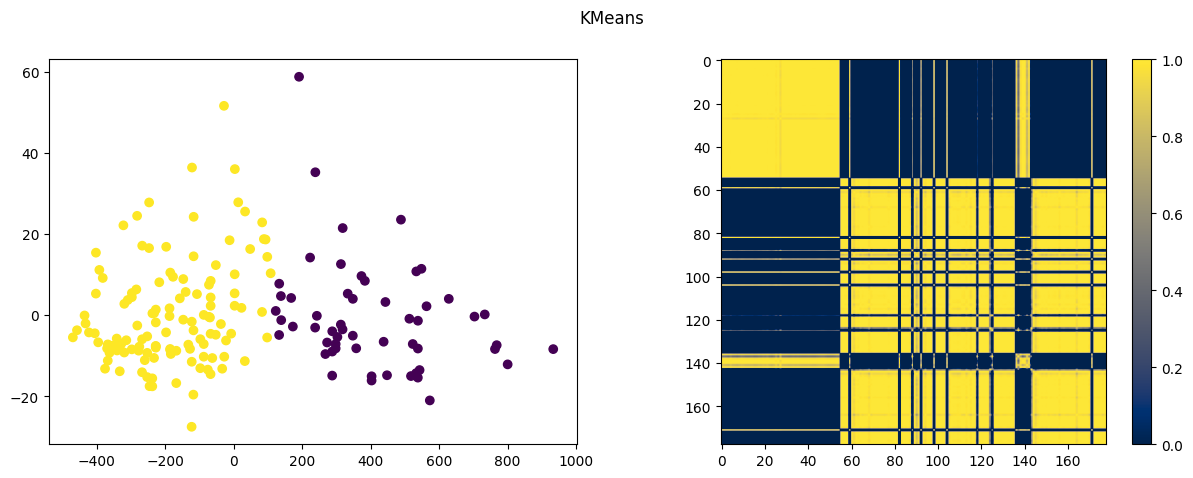

In [80]:
plot(X_reduced, kmeans)
plt.show()

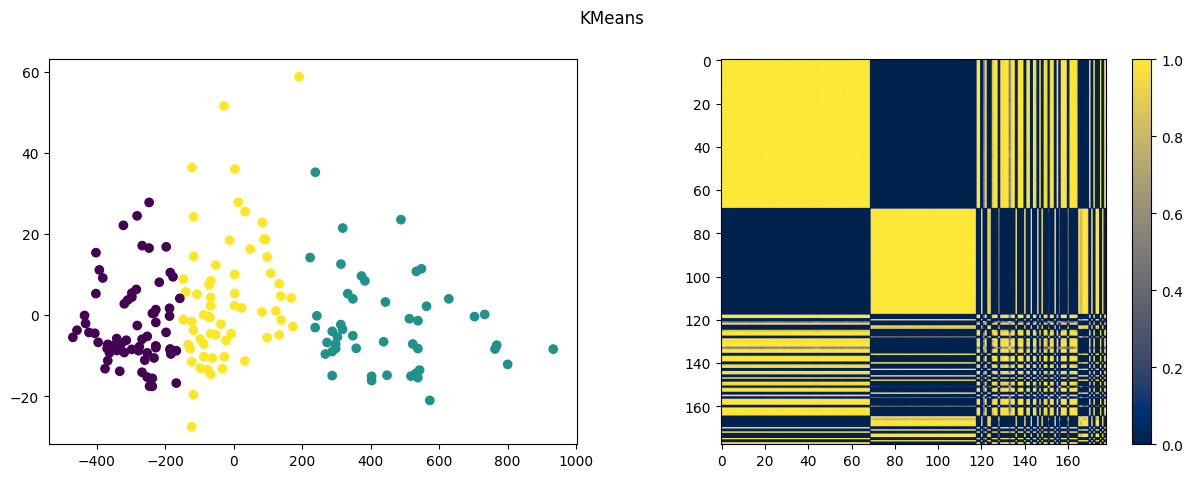

In [81]:
plot(X_reduced, kmeans_2)
plt.show()

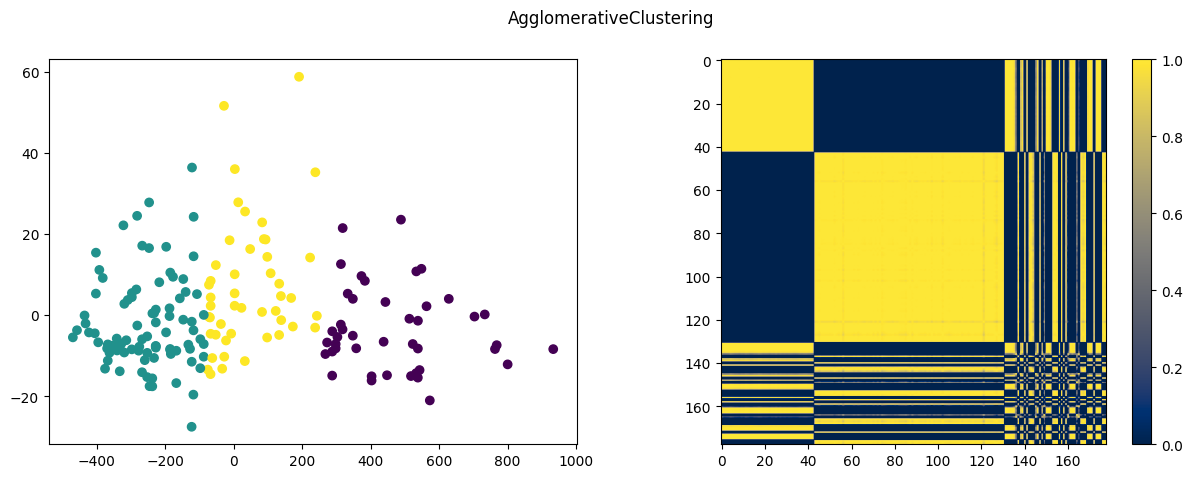

In [82]:
plot(X_reduced, complete_3)
plt.show()

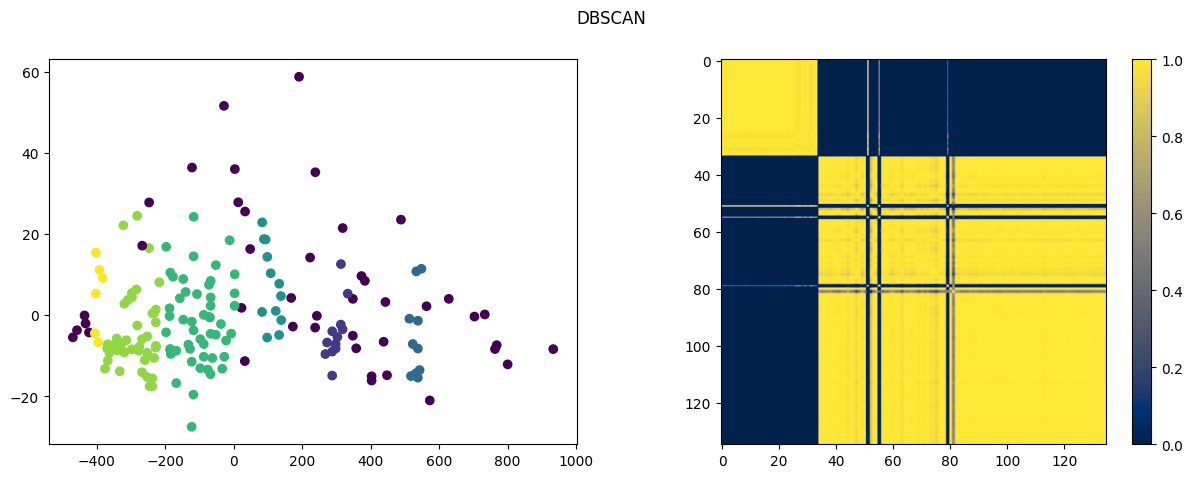

In [83]:
plot(X_reduced, dbscan)
plt.show()

**Respuesta**

> DBSCAN genera un mejor clustering dado que la matriz de similitud tiene menos ruido

### Pregunta 10

Luego de haber usado dos métodos de evaluación, responda brevemente:

1. ¿Dan resultados similiares en cuanto a la calidad de los cluster con los 3 métodos?
2. ¿Los resultados obtenidos son consistentes con sus predicciones hechas en la primera parte antes de realizar el clustering?

**Respuesta**

> Si dan resultados similares, solo que el uso para cada uno depende del problema que se esté tratando, por ejemplo, DBSCAN en este caso genera más clusters y separa el ruido

> Si son consistentes con las predicciones hechas, porque consideramos que los primeros métodos dan mejores resultados, pero DBSCAN no es tan malo como se esperaba, de todas formas obtiene buenas métricas de evaluación